<a href="https://colab.research.google.com/github/krishnapriya333/Credit_Score_Classification/blob/main/Credit_Score_Classifiction_week3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**





You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts

**Exploratory Data Analysis**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/credit.csv')

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.shape

(100000, 28)

In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:

df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [8]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [9]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

**Data Preprocessing**

In [10]:
#Missing Values
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

There are no missing values in the dataset

In [11]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [12]:
df_c = df.copy()

In [13]:
#dropping unneccessory columns
columns_to_drop = ['ID','Customer_ID','Month','Name','SSN','Type_of_Loan']

df_c.drop(columns=columns_to_drop, inplace=True)

In [14]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

In [15]:
#Detecting object and numerical columns
ob_cols=df_c.select_dtypes(exclude=['number']).columns

In [16]:

ob_cols

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [17]:
num_cols=df_c.select_dtypes(include=['number']).columns

In [18]:
num_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

**Outlier Detection and Removal**

In [19]:
def box_plot(df_c, num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
      plt.subplot(5,4, i+1)
      l = num_cols[i]
      sns.boxplot(df_c[l])

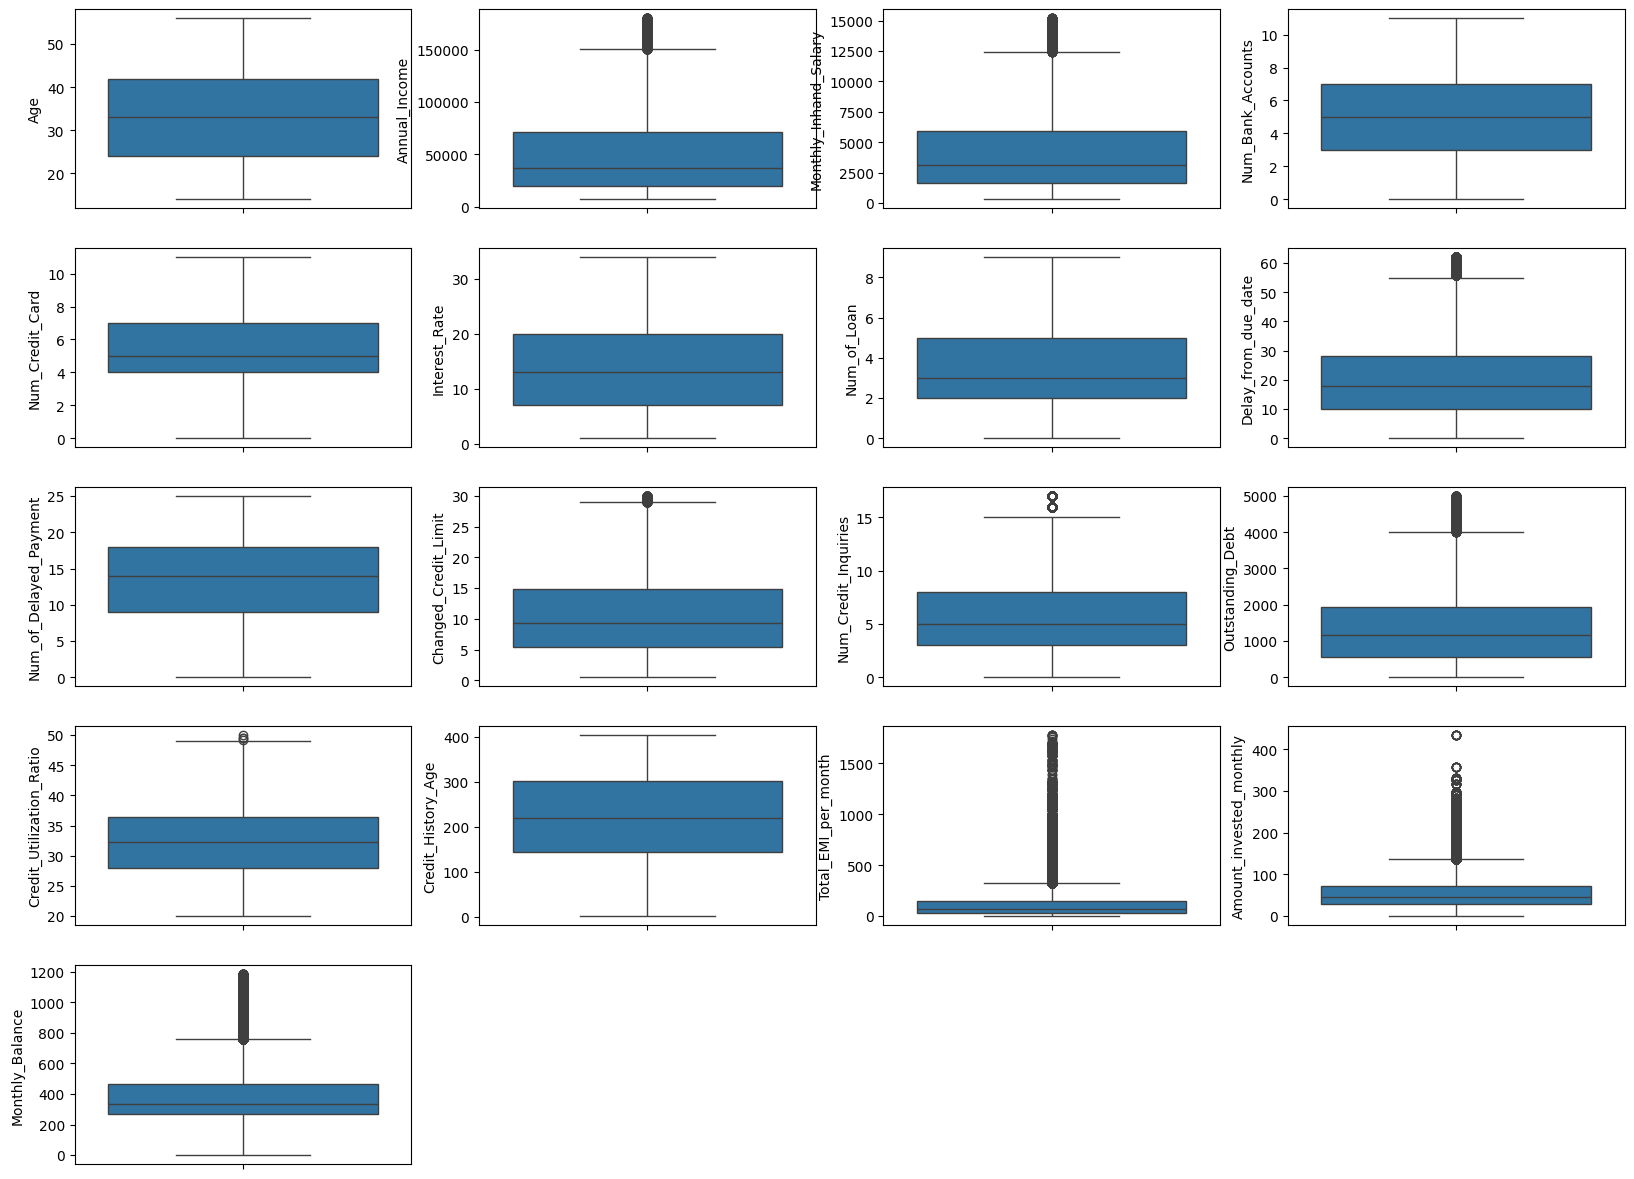

In [20]:
box_plot(df_c, num_cols)

In [21]:
df_c_n = df_c.copy()

In [22]:
def drop_outliers(df_c_n, num_cols):
  for i in num_cols:
    Q3 = np.percentile(df_c_n[i], 75)
    Q1 =  np.percentile(df_c_n[i], 25)
    IQR = Q3 - Q1
    # Identify the outliers
    outliers = df_c_n[(df_c_n[i] <=Q1 - 1.5 * IQR) | (df_c_n[i] >= Q3 + 1.5 * IQR)]
    df_c_n.drop(df_c_n[df_c_n[i]>=(1.5*IQR+Q3)].index,inplace = True)
    df_c_n.drop(df_c_n[df_c_n[i]<=(Q1-1.5*IQR)].index,inplace = True)
drop_outliers(df_c_n,num_cols)


In [23]:
drop_outliers(df_c_n, num_cols)

In [24]:
df_c.shape

(100000, 22)

In [25]:
df_c_n.shape

(53415, 22)

In [26]:
df_c_n.reset_index(inplace=True,drop=True)
df_c_n

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
53411,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
53412,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
53413,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [27]:

def box_plot(df_c_n, num_cols):
    plt.figure(figsize=(20, 15))
    for i,column in enumerate((num_cols)):
      plt.subplot(5,4, i+1)
      l = num_cols[i]
      sns.boxplot(df_c_n[l])

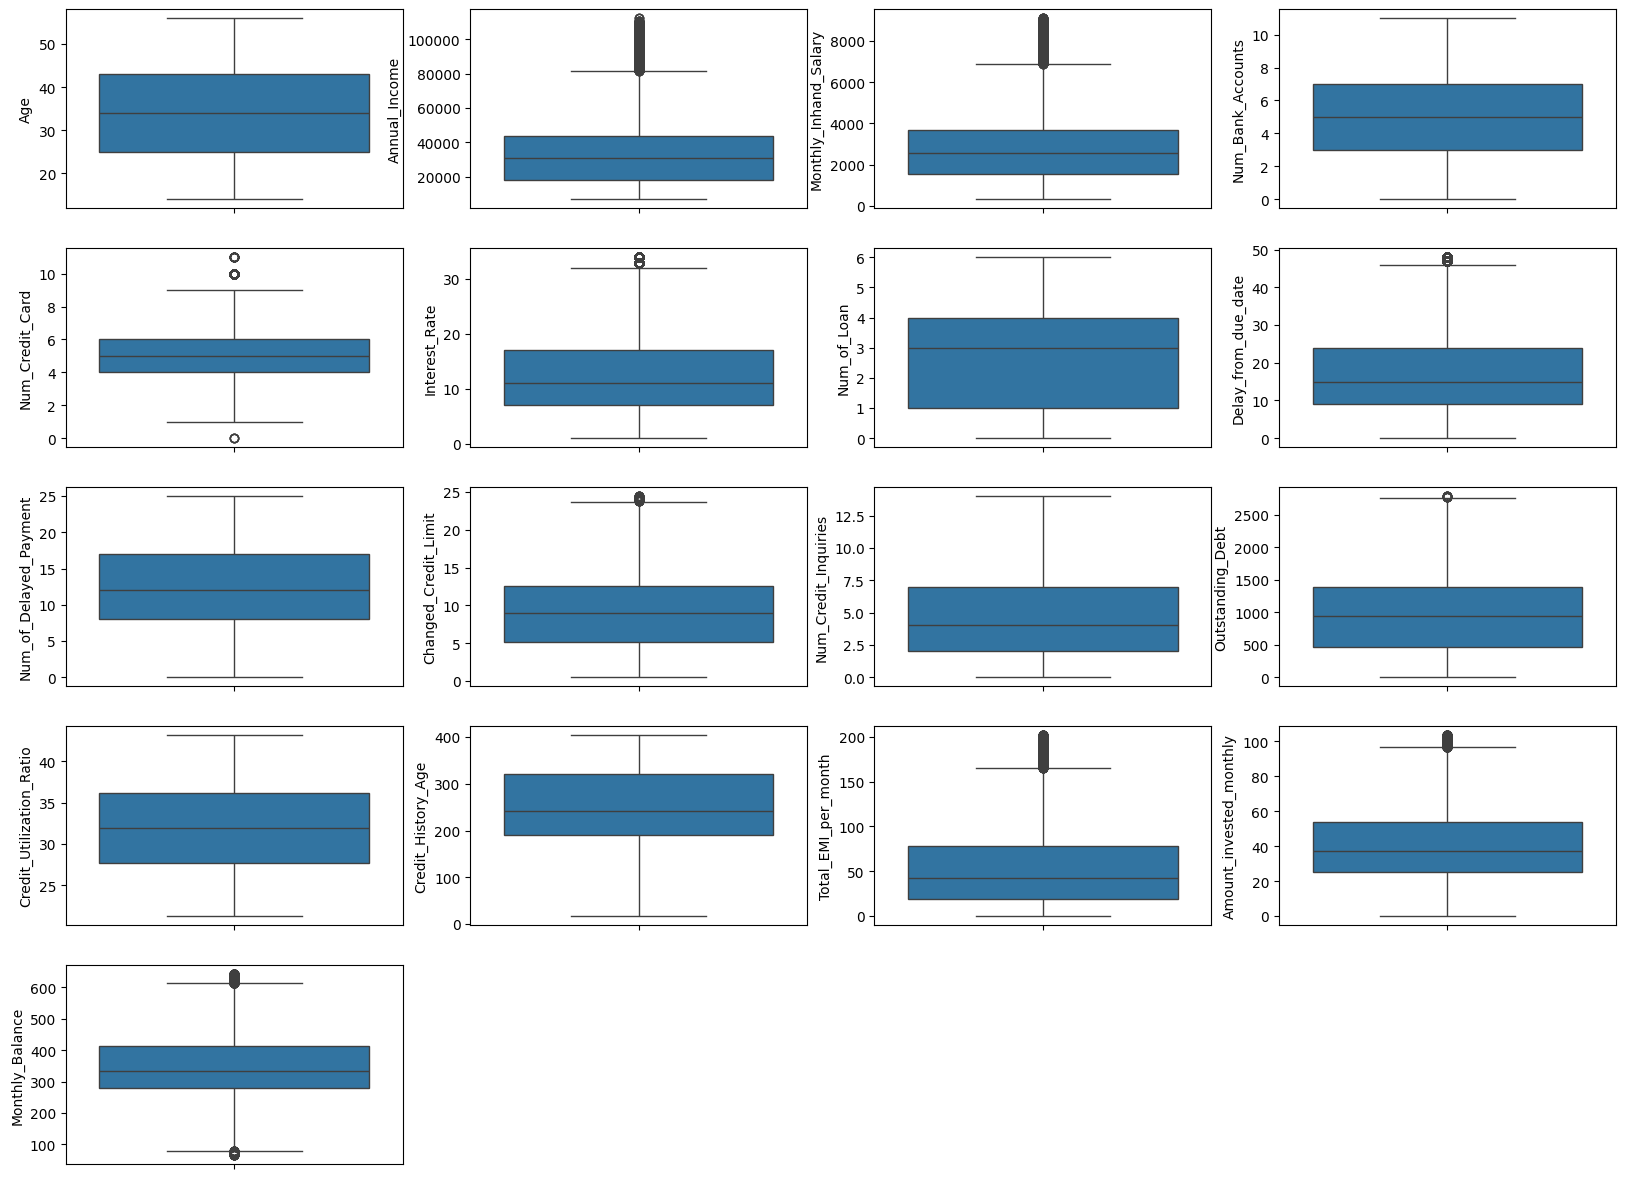

In [28]:
box_plot(df_c_n, num_cols)

**Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
df_num_clean = df_c_n[num_cols].copy()

In [31]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(df_num_clean)
standard_df = pd.DataFrame(standard_df, columns =num_cols)

In [32]:
standard_df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,-1.234998,0.823556,-1.350603,-0.899611,0.385759,-0.242663,-0.30361,-1.028516,0.200682,-0.111322,-0.922127,-0.377638
1,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,-1.234998,0.823556,-1.350603,-1.423002,0.385759,-0.242663,-0.30361,-0.000237,0.212017,-0.111322,-0.922127,-0.641830
2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,-1.234998,0.823556,-1.350603,-0.899611,0.385759,-0.242663,-0.30361,-0.669840,0.223352,-0.111322,-0.922127,-0.200191
3,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,-1.234998,0.823556,-1.150153,-1.423002,-0.582123,-0.242663,-0.30361,-0.114079,0.234687,-0.111322,-0.922127,-1.221867
4,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,-1.234998,0.823556,-1.049929,-1.423002,0.385759,-0.242663,-0.30361,-1.435077,0.246022,-0.111322,-0.922127,-0.102731


In [33]:
standard_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04
mean,1.718658e-16,-2.447625e-17,1.404724e-16,-3.192554e-18,1.553709e-16,-7.369478e-17,1.590956e-16,-7.342874e-17,-6.970409e-17,6.970409e-17,-4.469575e-17,-2.170937e-16,2.273364e-16,-2.341206e-17,1.170603e-17,1.351514e-16,3.623548e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.850418e+00,-1.335805e+00,-1.474631e+00,-2.030639e+00,-2.755876e+00,-1.498182e+00,-1.564494e+00,-1.651277e+00,-2.120857e+00,-1.699059e+00,-1.424422e+00,-1.520742e+00,-2.142406e+00,-2.610385e+00,-1.143511e+00,-1.937043e+00,-2.717720e+00
25%,-8.437172e-01,-7.886901e-01,-7.783307e-01,-7.734780e-01,-5.983764e-01,-7.086281e-01,-9.674810e-01,-7.492546e-01,-7.251471e-01,-7.989288e-01,-8.335421e-01,-8.131294e-01,-8.457218e-01,-6.494393e-01,-7.367702e-01,-7.523774e-01,-6.806114e-01
50%,-2.005297e-02,-1.912193e-01,-1.983685e-01,6.462909e-02,-5.900155e-02,-1.822585e-01,2.265440e-01,-1.479063e-01,-2.729231e-02,-6.333813e-02,-2.426627e-01,-9.684445e-02,1.624029e-03,-7.135701e-02,-2.600537e-01,-1.672904e-01,-1.683396e-01
75%,8.036113e-01,4.241158e-01,4.456403e-01,9.027362e-01,4.803734e-01,6.072959e-01,8.235565e-01,7.541162e-01,8.450262e-01,6.393445e-01,6.436565e-01,5.723636e-01,8.454901e-01,8.354388e-01,4.799458e-01,6.028666e-01,5.858598e-01
max,1.993348e+00,3.699698e+00,3.544789e+00,2.578950e+00,3.177248e+00,2.844367e+00,2.017582e+00,3.159509e+00,2.240736e+00,2.937097e+00,2.711735e+00,2.672623e+00,2.252580e+00,1.776239e+00,3.061372e+00,2.957076e+00,2.753798e+00


In [34]:
clean_df = df_c_n.copy()
clean_df.drop(labels=num_cols, axis="columns", inplace=True)
clean_df[num_cols] = standard_df[num_cols]

In [35]:
clean_df

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,Scientist,Good,No,High_spent_Small_value_payments,Good,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,...,-1.350603,-0.899611,0.385759,-0.242663,-0.303610,-1.028516,0.200682,-0.111322,-0.922127,-0.377638
1,Scientist,Good,No,Low_spent_Large_value_payments,Good,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,...,-1.350603,-1.423002,0.385759,-0.242663,-0.303610,-0.000237,0.212017,-0.111322,-0.922127,-0.641830
2,Scientist,Good,No,Low_spent_Medium_value_payments,Good,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,...,-1.350603,-0.899611,0.385759,-0.242663,-0.303610,-0.669840,0.223352,-0.111322,-0.922127,-0.200191
3,Scientist,Good,No,Low_spent_Small_value_payments,Good,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,...,-1.150153,-1.423002,-0.582123,-0.242663,-0.303610,-0.114079,0.234687,-0.111322,-0.922127,-1.221867
4,Scientist,Good,No,High_spent_Medium_value_payments,Good,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,...,-1.049929,-1.423002,0.385759,-0.242663,-0.303610,-1.435077,0.246022,-0.111322,-0.922127,-0.102731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,Mechanic,Good,No,High_spent_Large_value_payments,Poor,-0.843717,0.224521,0.258848,-0.354424,0.480373,...,0.653891,-0.899611,0.430282,-0.538102,-0.765962,0.545507,1.481531,-0.412618,-0.800939,1.209243
53411,Mechanic,Good,No,High_spent_Medium_value_payments,Poor,-0.843717,0.224521,0.258848,-0.354424,0.480373,...,0.152768,-0.899611,0.430282,-0.538102,-0.765962,1.730309,1.492866,-0.412618,-0.800939,1.368388
53412,Mechanic,Good,No,High_spent_Large_value_payments,Poor,-0.843717,0.224521,0.258848,-0.354424,0.480373,...,1.054790,-1.074075,0.430282,-0.538102,-0.765962,1.868801,1.504201,-0.412618,-0.800939,1.559504
53413,Mechanic,Good,No,Low_spent_Large_value_payments,Standard,-0.843717,0.224521,0.258848,-0.354424,0.480373,...,0.353217,-1.074075,0.430282,-0.538102,-0.765962,0.339672,1.515536,-0.412618,-0.800939,-0.314390


**Encoding**

In [36]:
clean_df['Credit_Score'].value_counts()

Credit_Score
Standard    30455
Poor        12377
Good        10583
Name: count, dtype: int64

In [37]:
clean_df["Credit_Score"] = clean_df["Credit_Score"].map({"Standard": 1,
                               "Good": 2,
                               "Poor": 0})


In [38]:
clean_df['Credit_Mix'].value_counts()

Credit_Mix
Standard    30817
Good        18591
Bad          4007
Name: count, dtype: int64

In [39]:
clean_df["Credit_Mix"] = clean_df["Credit_Mix"].map({"Standard": 1,
                               "Good": 2,
                               "Bad": 0})

In [40]:
clean_df.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,Scientist,2,No,High_spent_Small_value_payments,2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,...,-1.350603,-0.899611,0.385759,-0.242663,-0.30361,-1.028516,0.200682,-0.111322,-0.922127,-0.377638
1,Scientist,2,No,Low_spent_Large_value_payments,2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,...,-1.350603,-1.423002,0.385759,-0.242663,-0.30361,-0.000237,0.212017,-0.111322,-0.922127,-0.641830
2,Scientist,2,No,Low_spent_Medium_value_payments,2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,...,-1.350603,-0.899611,0.385759,-0.242663,-0.30361,-0.669840,0.223352,-0.111322,-0.922127,-0.200191
3,Scientist,2,No,Low_spent_Small_value_payments,2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,...,-1.150153,-1.423002,-0.582123,-0.242663,-0.30361,-0.114079,0.234687,-0.111322,-0.922127,-1.221867
4,Scientist,2,No,High_spent_Medium_value_payments,2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,...,-1.049929,-1.423002,0.385759,-0.242663,-0.30361,-1.435077,0.246022,-0.111322,-0.922127,-0.102731


In [41]:
df_c_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       53415 non-null  float64
 1   Occupation                53415 non-null  object 
 2   Annual_Income             53415 non-null  float64
 3   Monthly_Inhand_Salary     53415 non-null  float64
 4   Num_Bank_Accounts         53415 non-null  float64
 5   Num_Credit_Card           53415 non-null  float64
 6   Interest_Rate             53415 non-null  float64
 7   Num_of_Loan               53415 non-null  float64
 8   Delay_from_due_date       53415 non-null  float64
 9   Num_of_Delayed_Payment    53415 non-null  float64
 10  Changed_Credit_Limit      53415 non-null  float64
 11  Num_Credit_Inquiries      53415 non-null  float64
 12  Credit_Mix                53415 non-null  object 
 13  Outstanding_Debt          53415 non-null  float64
 14  Credit

In [42]:
clean_df = pd.get_dummies(data = clean_df,dtype='uint8',drop_first=True)

In [43]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Credit_Mix                                          53415 non-null  int64  
 1   Credit_Score                                        53415 non-null  int64  
 2   Age                                                 53415 non-null  float64
 3   Annual_Income                                       53415 non-null  float64
 4   Monthly_Inhand_Salary                               53415 non-null  float64
 5   Num_Bank_Accounts                                   53415 non-null  float64
 6   Num_Credit_Card                                     53415 non-null  float64
 7   Interest_Rate                                       53415 non-null  float64
 8   Num_of_Loan                                         53415 non-null  float64


In [44]:
clean_df

,Credit_Mix,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,2,2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,-1.234998,0.823556,-1.350603,...,1,0,0,1,0,0,1,0,0,0
1,2,2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,-1.234998,0.823556,-1.350603,...,1,0,0,1,0,0,0,1,0,0
2,2,2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,-1.234998,0.823556,-1.350603,...,1,0,0,1,0,0,0,0,1,0
3,2,2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,-1.234998,0.823556,-1.150153,...,1,0,0,1,0,0,0,0,0,1
4,2,2,-1.026754,-0.756683,-0.619964,-0.773478,-0.598376,-1.234998,0.823556,-1.049929,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,2,0,-0.843717,0.224521,0.258848,-0.354424,0.480373,-0.708628,-0.370469,0.653891,...,0,0,0,1,0,0,0,0,0,0
53411,2,0,-0.843717,0.224521,0.258848,-0.354424,0.480373,-0.708628,-0.370469,0.152768,...,0,0,0,1,0,1,0,0,0,0
53412,2,0,-0.843717,0.224521,0.258848,-0.354424,0.480373,-0.708628,-0.370469,1.054790,...,0,0,0,1,0,0,0,0,0,0
53413,2,1,-0.843717,0.224521,0.258848,-0.354424,0.480373,-0.708628,-0.370469,0.353217,...,0,0,0,1,0,0,0,1,0,0


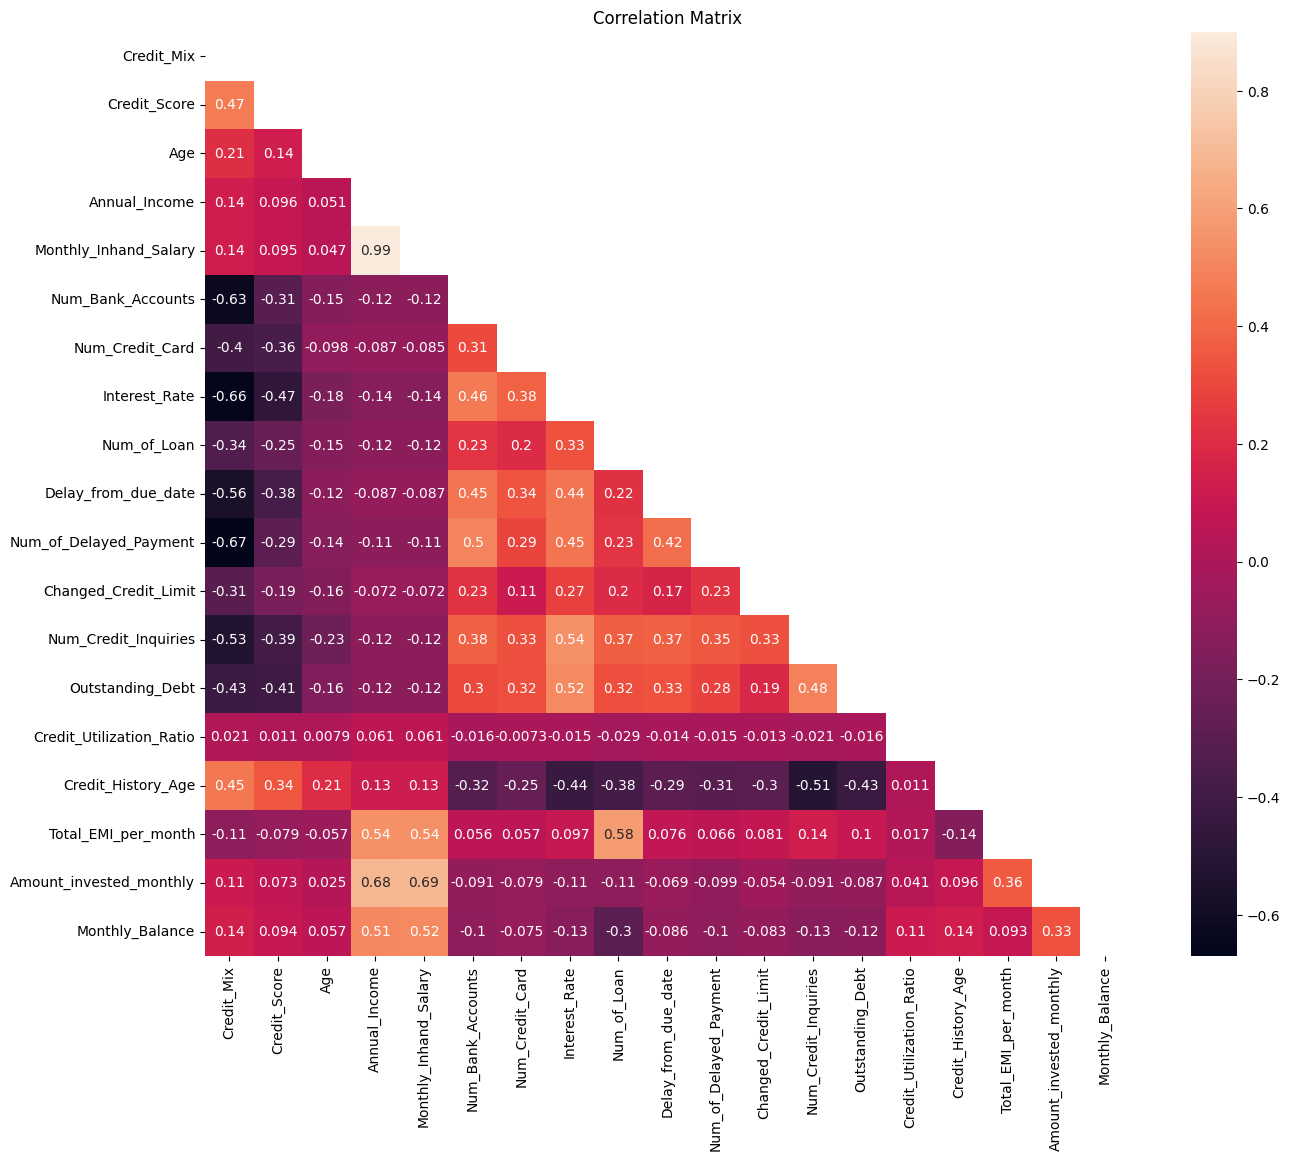

In [45]:
corr = clean_df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

From the Correlation Matrix we can see that credit_mix has strong correlation with credit_score compared to other features

Features like num_bank_accounts,num_credit_card,interest_rate,num_of_loan etc are negatively correlated.

**Data Splitting**

In [120]:
X = clean_df.drop(columns=['Credit_Score'], axis=0, inplace=False)
y = clean_df['Credit_Score']

**Training and Testing Data**

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
# Splitting data in Testing and Training Sets with 33% percent data being used for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)

**Modelling**

**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train, y_train)
lr_pred = LR.predict(X_test)

0.7031826175753106
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      4067
           1       0.76      0.79      0.77     10116
           2       0.56      0.69      0.62      3444

    accuracy                           0.70     17627
   macro avg       0.68      0.66      0.66     17627
weighted avg       0.71      0.70      0.70     17627



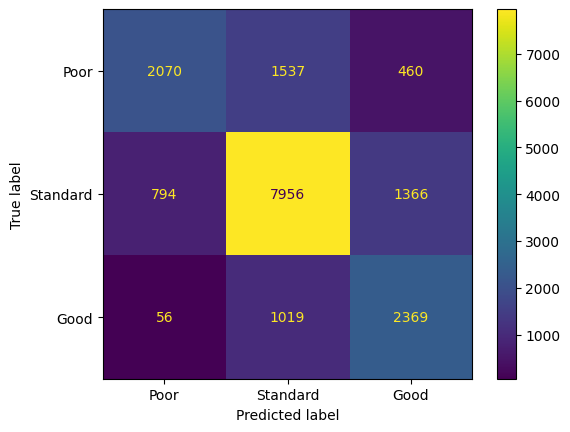

In [50]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)
print(classification_report(y_test,lr_pred))
result = confusion_matrix(y_test,lr_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

**Decision Tree Classifier**

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
dtc= dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

0.709763431100017
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      4120
           1       0.71      0.85      0.77      8384
           2       0.76      0.51      0.61      5123

    accuracy                           0.71     17627
   macro avg       0.71      0.68      0.68     17627
weighted avg       0.72      0.71      0.70     17627



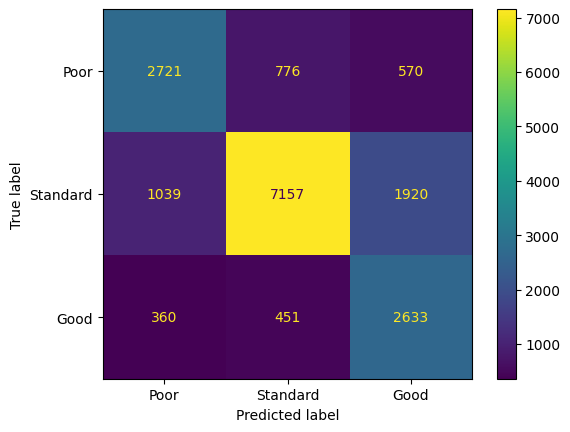

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=accuracy_score(dtc_pred,y_test)
print(accuracy_score(dtc_pred,y_test))
print(classification_report(dtc_pred,y_test))
result = confusion_matrix(y_test,dtc_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()


**Random Forest Classifier**

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500,random_state=77)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

0.8275940318829069
[[3316  862    8]
 [ 729 8522  686]
 [  22  732 2750]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      4186
           1       0.84      0.86      0.85      9937
           2       0.80      0.78      0.79      3504

    accuracy                           0.83     17627
   macro avg       0.82      0.81      0.82     17627
weighted avg       0.83      0.83      0.83     17627



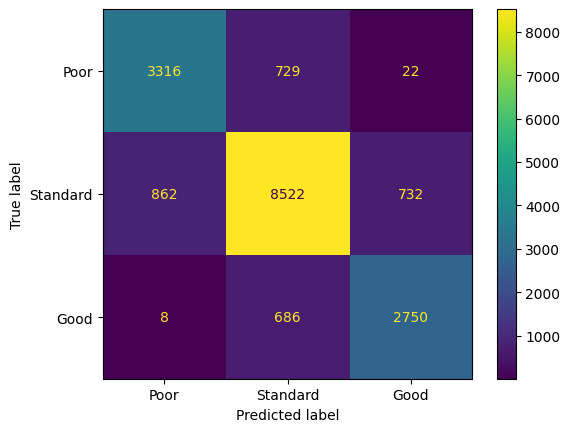

In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=accuracy_score(rfc_pred,y_test)
print(accuracy_score(rfc_pred,y_test))
print(confusion_matrix(rfc_pred,y_test))
print(classification_report(rfc_pred,y_test))
result = confusion_matrix(y_test,rfc_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

**Gradient Boosting Classifier**

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train, y_train)
GBC_pred=GBC.predict(X_test)

0.7473194531117037
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      4067
           1       0.82      0.78      0.80     10116
           2       0.60      0.75      0.66      3444

    accuracy                           0.75     17627
   macro avg       0.72      0.73      0.72     17627
weighted avg       0.76      0.75      0.75     17627



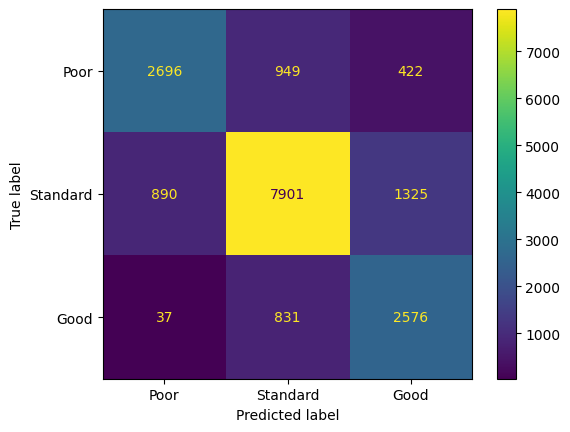

In [56]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
print(accuracy_score(y_test, GBC_pred))
print(classification_report(y_test,GBC_pred))
result = confusion_matrix(y_test,GBC_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

**Support Vector Machine**

In [57]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

0.7464684858455778
              precision    recall  f1-score   support

           0       0.76      0.66      0.70      4067
           1       0.82      0.77      0.80     10116
           2       0.58      0.77      0.66      3444

    accuracy                           0.75     17627
   macro avg       0.72      0.73      0.72     17627
weighted avg       0.76      0.75      0.75     17627



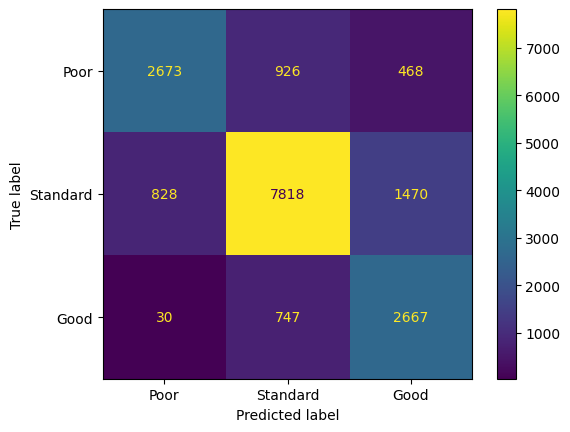

In [58]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, svc_pred)
print(accuracy_score(y_test, svc_pred))
print(classification_report(y_test,svc_pred))
result = confusion_matrix(y_test,svc_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

**K Nearest Neighbour**

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

0.7873149146196177
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      4067
           1       0.84      0.80      0.82     10116
           2       0.73      0.74      0.74      3444

    accuracy                           0.79     17627
   macro avg       0.76      0.78      0.77     17627
weighted avg       0.79      0.79      0.79     17627



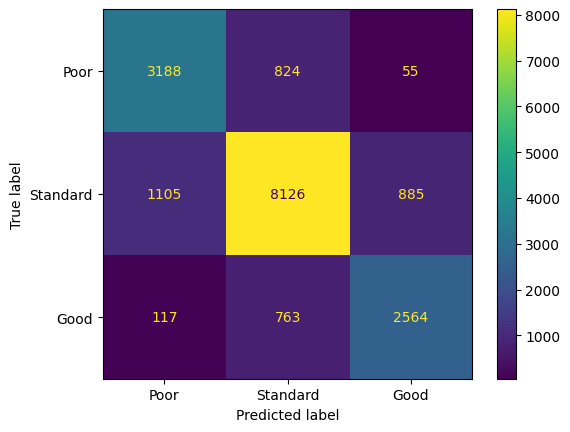

In [60]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, knn_pred)
print(accuracy_score(y_test, knn_pred))
print(classification_report(y_test,knn_pred))
result = confusion_matrix(y_test,knn_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

**XGBOOST Classifier**

In [61]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=3500, learning_rate=0.05, random_state=77)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

0.8190276280705735
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      4067
           1       0.85      0.84      0.84     10116
           2       0.77      0.78      0.78      3444

    accuracy                           0.82     17627
   macro avg       0.80      0.80      0.80     17627
weighted avg       0.82      0.82      0.82     17627



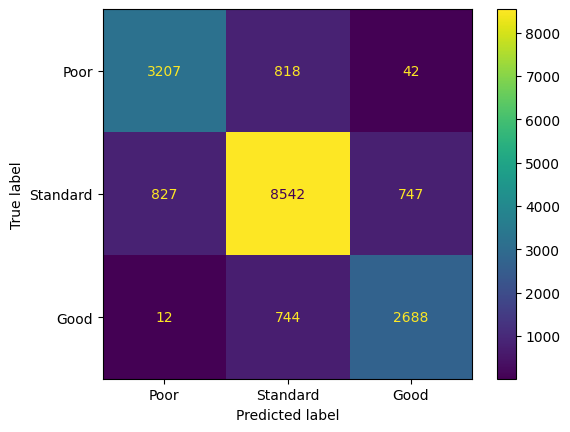

In [62]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, xgb_pred)
print(accuracy_score(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))
result = confusion_matrix(y_test,xgb_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

Random Forest has better accuracy compared to other models

**Cross Validation**

**Kfold validation**

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state=42)

In [64]:
from sklearn.model_selection import KFold

In [65]:
kfold_validator = KFold(10)
for train_index,test_index in kfold_validator.split(X,y):
    print('trainig index:',train_index)
    print('test index:',test_index)

trainig index: [ 5342  5343  5344 ... 53412 53413 53414]
test index: [   0    1    2 ... 5339 5340 5341]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [ 5342  5343  5344 ... 10681 10682 10683]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [10684 10685 10686 ... 16023 16024 16025]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [16026 16027 16028 ... 21365 21366 21367]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [21368 21369 21370 ... 26707 26708 26709]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [26710 26711 26712 ... 32048 32049 32050]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [32051 32052 32053 ... 37389 37390 37391]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [37392 37393 37394 ... 42730 42731 42732]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [42733 42734 42735 ... 48071 48072 48073]
trainig

In [66]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(rfc,X,y,cv=kfold_validator)
cv_result

array([0.7231374 , 0.72220142, 0.73530513, 0.73380756, 0.72688132,
       0.72683018, 0.71915372, 0.71877925, 0.73525557, 0.72626849])

In [67]:
kf = np.mean(cv_result)
kf

0.7267620046277075

**Stratified Kfold Validation**

In [68]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)

In [69]:

for train_index,test_index in skfold_validator.split(X,y):
    print('trainig index:',train_index)
    print('test index:',test_index)

trainig index: [ 5146  5148  5150 ... 53412 53413 53414]
test index: [   0    1    2 ... 5422 5423 5424]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [ 5146  5148  5150 ... 11128 11129 11130]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [10542 10543 10544 ... 16322 16323 16324]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [15842 15850 15852 ... 21830 21831 21901]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [21181 21182 21186 ... 27060 27081 27082]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [26398 26399 26400 ... 32198 32199 32200]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [31709 31710 31768 ... 37565 37566 37567]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [37192 37193 37194 ... 43424 43425 43426]
trainig index: [    0     1     2 ... 53412 53413 53414]
test index: [41980 41981 41982 ... 48140 48141 48142]
trainig

In [70]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(rfc,X,y,cv=skfold_validator)
cv_result

array([0.72014227, 0.70610258, 0.72145264, 0.7186447 , 0.72856608,
       0.71746864, 0.71353679, 0.71409848, 0.7281408 , 0.72083879])

In [71]:
kf = np.mean(cv_result)
kf

0.7188991779016279

**Hyperparmeter Tuning**

In [72]:
parameters ={'max_depth': [3,6,9],
              'criterion' : ['gini', 'entropy'],
              'n_estimators': [25,50,100,150],
             'max_leaf_nodes': [3, 6, 9]}

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid_search = GridSearchCV(rfc,
                            parameters,
                            cv=5,
                            scoring='accuracy',n_jobs=-1)

In [75]:
grid_result= grid_search.fit(X_train, y_train)

In [76]:
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)
grid = grid_result.best_score_

Best Params:  {'criterion': 'entropy', 'max_depth': 9, 'max_leaf_nodes': 9, 'n_estimators': 150}
Best Score:  0.6954005486571626


In [77]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator = RandomForestClassifier(),
                                 param_distributions=parameters,verbose=1, n_jobs=-1,
                                  n_iter=50)

In [78]:
random_result = random_search.fit(X_train, y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Score:  70.00108101131595
Best Params:  {'n_estimators': 25, 'max_leaf_nodes': 9, 'max_depth': 6, 'criterion': 'gini'}


**Model Interpretability**

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state=42)
model = rfc.fit(X_train,y_train)

In [80]:
rfc.feature_importances_

array([0.09600822, 0.03463828, 0.03590551, 0.03542487, 0.02878914,
       0.04515162, 0.08673311, 0.01735531, 0.05446154, 0.04071459,
       0.04141792, 0.04062262, 0.10385408, 0.04765665, 0.06499262,
       0.03207488, 0.03572958, 0.04827785, 0.0032577 , 0.00359044,
       0.00302797, 0.00314869, 0.00337444, 0.00305958, 0.00341456,
       0.00325006, 0.00316263, 0.00295595, 0.00292114, 0.00321003,
       0.00307685, 0.00301337, 0.0150785 , 0.01849143, 0.00683275,
       0.00556564, 0.00522197, 0.00562002, 0.00891789])

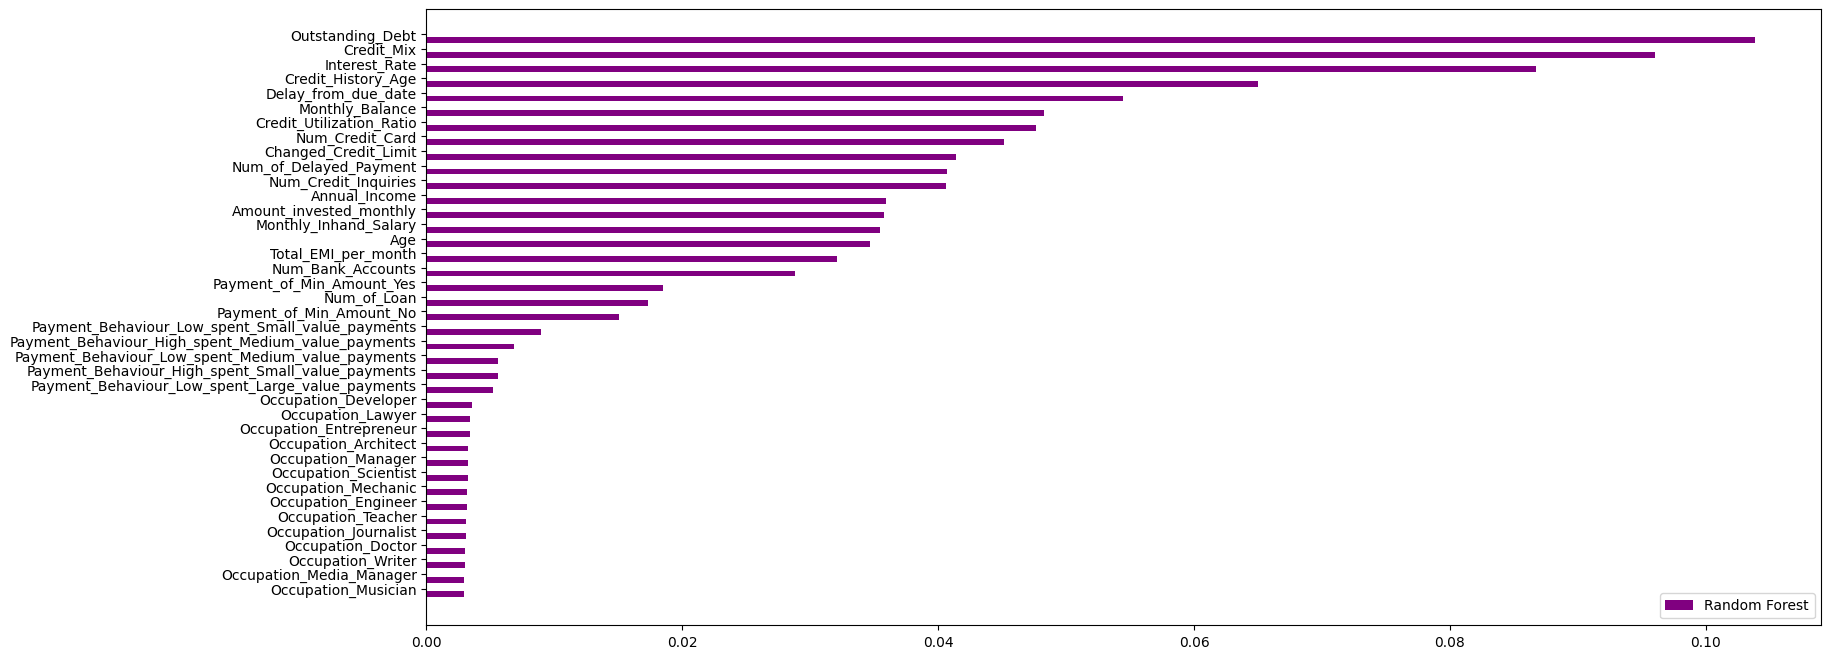

In [81]:
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=clean_df.drop(columns=['Credit_Score']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [82]:
feature_importance

,rfc
Occupation_Musician,0.002921
Occupation_Media_Manager,0.002956
Occupation_Writer,0.003013
Occupation_Doctor,0.003028
Occupation_Journalist,0.003060
Occupation_Teacher,0.003077
Occupation_Engineer,0.003149
Occupation_Mechanic,0.003163
Occupation_Scientist,0.003210
Occupation_Manager,0.003250


**Threshold Selection**

In [159]:

from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [160]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [161]:

y = label_binarize(y, classes=[0,1,2])
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.33, random_state=42)
rfc = RandomForestClassifier()
ovr = OneVsRestClassifier(rfc)
ovr.fit(X_train, y_train)
y_pred = ovr.predict(X_test)
y_pred_prob = ovr.predict_proba(X_test)

In [162]:
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3

for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i],
                                              y_pred_prob[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])

auc_score

[0.9494981098314154, 0.8916351312657608, 0.951908459629615]

[]

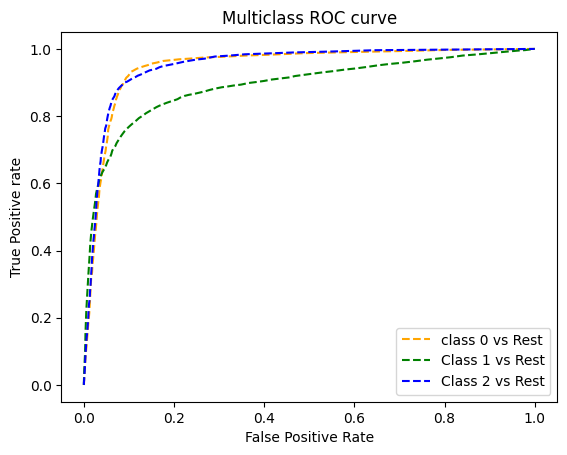

In [163]:
# plotting

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',label= 'class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);
plt.plot()

In [164]:
auc_score

[0.9494981098314154, 0.8916351312657608, 0.951908459629615]

In [165]:


sum(auc_score) / n_classes

0.9310139002422636